---

# Loading data


In [57]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [58]:
print(len(text)) # 1115394 Character
print(text[:200])

1115394
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you


In [59]:
vocab = sorted(set(text)) 
print(f"Vocab size: {len(vocab)}")
print("Our vocab: ","".join(vocab))

# To Map ch to int and vice versa
stoi = { ch:i for i,ch in enumerate(vocab) }
itos = { i:ch for i,ch in enumerate(vocab) }

encode = lambda s: [stoi[c] for c in s] 
decode = lambda l: ''.join([itos[i] for i in l]) 

Vocab size: 65
Our vocab:  
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


In [60]:
print(encode("helo world"))
print(decode(encode("helo world")))

[46, 43, 50, 53, 1, 61, 53, 56, 50, 42]
helo world


Note: There tried off between (Number of Vocab & Seqance length)

People use in Practice Subword encodeing such as :

- https://github.com/google/sentencepiece (google)
- https://github.com/openai/tiktoken (Open Ai)


---

# Prepare the Dataset


In [61]:
import torch

data = torch.tensor(encode(text))
data[:200]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59])

In [62]:
tl = int(len(text) * 0.9)

train_data = data[:tl]
vaild_data = data[tl:]

In [63]:
block_size = 8 # Block Size == Context Window ( Max number can Network see to predict next token)

train_data[:block_size+1] 

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [64]:
X = train_data[:block_size] # 
y = train_data[1:block_size+1] 
 
for t in range(block_size):
    print(f"When input is: {X[:t+1]} target: -> {y[t]}")
    #       When input is: {Context} target: -> {target}

When input is: tensor([18]) target: -> 47
When input is: tensor([18, 47]) target: -> 56
When input is: tensor([18, 47, 56]) target: -> 57
When input is: tensor([18, 47, 56, 57]) target: -> 58
When input is: tensor([18, 47, 56, 57, 58]) target: -> 1
When input is: tensor([18, 47, 56, 57, 58,  1]) target: -> 15
When input is: tensor([18, 47, 56, 57, 58,  1, 15]) target: -> 47
When input is: tensor([18, 47, 56, 57, 58,  1, 15, 47]) target: -> 58


In [65]:
torch.manual_seed(1337)

batch_size = 4
block_size = 8

def get_batch(spilt:str):

    data = train_data if spilt == "train" else  vaild_data
    ix = torch.randint(len(data) - block_size ,(batch_size,))
    x = torch.stack([data[i : i+block_size] for i in ix])
    y = torch.stack([data[i+1 : i+block_size+1] for i in ix])
    
    return x , y

xb , yb = get_batch('train')

print(f"input: shape - {xb.shape}")
print(xb)
print()
print(f"target: shape - {yb.shape}")
print(yb)

print('----')
for b in range(batch_size): 
    for t in range(block_size): 
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")
    break


input: shape - torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])

target: shape - torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39


---

# Bigram language model


In [66]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C) (4,8,65)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
    
        for _ in range(max_new_tokens):
    
            logits, loss = self(idx)
            logits = logits[:, -1, :]

            probs = F.softmax(logits, dim=-1) # (B, C)
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(len(vocab))
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist())) # Just generationn from untrained model


torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [67]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [68]:
batch_size = 32
for steps in range(1000):

    xb, yb = get_batch('train')

    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


3.721843719482422


In [69]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=200)[0].tolist()))


olylvLLko'TMyatyIoconxad.?-tNSqYPsx&bF.oiR;BD$dZBMZv'K f bRSmIKptRPly:AUC&$zLK,qUEy&Ay;ZxjKVhmrdagC-bTop-QJe.H?x
JGF&pwst-P sti.hlEsu;w:w a BG:tLhMk,epdhlay'sVzLq--ERwXUzDnq-bn czXxxI&V&Pynnl,s,Ioto!u


---

# Self Attention


In [70]:
torch.manual_seed(1337)
B , T , C = 4,8,2 # batch , time (context) , channels (feature)

x = torch.randn(B,T,C)
x[0]

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

In [71]:
xbow = torch.zeros((B,T,C)) # bag of words
for b in range(B):
    for t in range(T):
        xprev = x[b , :t+1]
        xbow[b,t] = torch.mean(xprev , 0) # take avarge in channls

In [72]:
xbow[0]

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [73]:
a = torch.ones(3,3)
b = torch.randint(0,10,(3,2)).float()

c = a @ b 
print("a :")
print(a)
print("-----")
print("b :")
print(b)
print("-----")
print("c :")
print(c) # Just Sum of Product 

a :
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
-----
b :
tensor([[8., 6.],
        [5., 2.],
        [4., 4.]])
-----
c :
tensor([[17., 12.],
        [17., 12.],
        [17., 12.]])


In [74]:
a = torch.ones(3,3).tril()
b = torch.randint(0,10,(3,2)).float()

c = a @ b 
print("a :")
print(a)
print("-----")
print("b :")
print(b)
print("-----")
print("c :")
print(c) # Just moving Sum of Product

a :
tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])
-----
b :
tensor([[7., 4.],
        [5., 0.],
        [5., 3.]])
-----
c :
tensor([[ 7.,  4.],
        [12.,  4.],
        [17.,  7.]])


In [75]:
a = torch.ones(3,3).tril()
a = a / a.sum(dim=1,keepdim=True)
b = torch.randint(0,10,(3,2)).float()

c = a @ b 
print("-----")
print("a :")
print(a)
print("-----")
print("b :")
print(b)
print("-----")
print("c :")
print(c) # Bag of word

-----
a :
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
-----
b :
tensor([[8., 9.],
        [2., 7.],
        [3., 9.]])
-----
c :
tensor([[8.0000, 9.0000],
        [5.0000, 8.0000],
        [4.3333, 8.3333]])


In [76]:
wei = torch.ones((T,T)).tril()
wei = wei / wei.sum(dim=1,keepdim=True)
xbow2 = wei @ x # Wei (B`,T,T) ----> X (B,T,C)


torch.allclose(xbow, xbow2)

True

In [77]:
tril = torch.tril(torch.ones(T, T))

wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
print(wei)
wei = F.softmax(wei, dim=1)

print(wei)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])


True

---

# Head Self Attention


In [119]:
torch.manual_seed(1337)
B, T , C = 4 , 8 , 32
x = torch.rand((B,T,C))

head_size = 16
key   = nn.Linear(C, head_size, bias=False)
Query = nn.Linear(C, head_size, bias=False)
Value = nn.Linear(C, head_size, bias=False)

k = key(x)   # B , T , 16 
q = Query(x) # B , T , 16 

wei = q @ k.transpose(-2, -1) # (B , T , 16)  @  (B , 16 , T) --> (B , T , T)

v = Value(x)

tril = torch.tril(torch.ones(T, T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=1)

out = wei @ v
out[0]

tensor([[ 0.0204, -0.0391,  0.0178,  0.0165, -0.0368, -0.0172, -0.0406, -0.0505,
          0.0078, -0.0297,  0.0026, -0.0592, -0.0087,  0.0668, -0.0340,  0.0587],
        [ 0.0553, -0.0181,  0.0479,  0.0066, -0.0785,  0.0138, -0.0567, -0.1093,
         -0.0072, -0.0792, -0.0183, -0.1212, -0.0386,  0.1139, -0.0293,  0.0830],
        [ 0.0831, -0.0456,  0.1524,  0.0024, -0.1861,  0.0024, -0.1470, -0.2504,
         -0.0125, -0.1499,  0.0301, -0.2453, -0.0768,  0.1990, -0.0341,  0.1078],
        [ 0.0788, -0.0118,  0.2331, -0.0180, -0.3258,  0.0157, -0.2298, -0.3357,
         -0.0248, -0.2351,  0.0741, -0.3522, -0.0804,  0.2440, -0.0814,  0.1905],
        [ 0.1420, -0.0044,  0.3057, -0.0109, -0.5126, -0.0669, -0.3560, -0.4949,
         -0.1006, -0.2830,  0.1356, -0.5250, -0.0783,  0.3854, -0.1409,  0.3913],
        [ 0.2106,  0.0093,  0.4682, -0.0122, -0.5437, -0.0493, -0.4401, -0.6103,
         -0.0891, -0.4062, -0.0072, -0.7229, -0.0849,  0.4673, -0.1836,  0.4576],
        [ 0.4123,  0.0

In [120]:
wei[0]

tensor([[0.0983, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1021, 0.1143, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1358, 0.1359, 0.1822, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1432, 0.1657, 0.1583, 0.1953, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1392, 0.1450, 0.1623, 0.2103, 0.2762, 0.0000, 0.0000, 0.0000],
        [0.1060, 0.1567, 0.1554, 0.1956, 0.1875, 0.2793, 0.0000, 0.0000],
        [0.1337, 0.1258, 0.1578, 0.1802, 0.2543, 0.3363, 0.5624, 0.0000],
        [0.1417, 0.1566, 0.1841, 0.2186, 0.2821, 0.3844, 0.4376, 1.0000]],
       grad_fn=<SelectBackward0>)

Notes:

- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below


---

# Build Transfomer

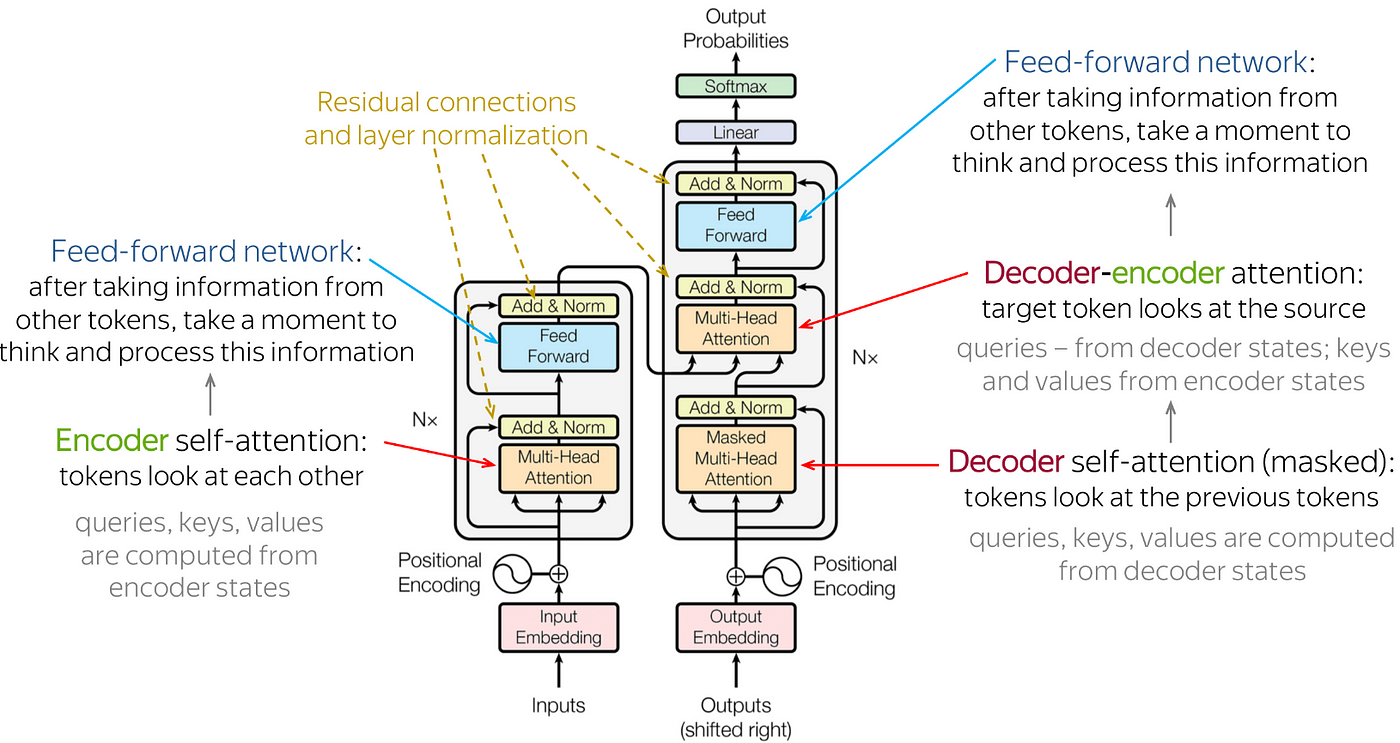


In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


- EX1: The n-dimensional tensor mastery challenge: Combine the `Head` and `MultiHeadAttention` into one class that processes all the heads in parallel, treating the heads as another batch dimension (answer is in nanoGPT).
- EX2: Train the GPT on your own dataset of choice! What other data could be fun to blabber on about? (A fun advanced suggestion if you like: train a GPT to do addition of two numbers, i.e. a+b=c. You may find it helpful to predict the digits of c in reverse order, as the typical addition algorithm (that you're hoping it learns) would proceed right to left too. You may want to modify the data loader to simply serve random problems and skip the generation of train.bin, val.bin. You may want to mask out the loss at the input positions of a+b that just specify the problem using y=-1 in the targets (see CrossEntropyLoss ignore_index). Does your Transformer learn to add? Once you have this, swole doge project: build a calculator clone in GPT, for all of +-\*/. Not an easy problem. You may need Chain of Thought traces.)
- EX3: Find a dataset that is very large, so large that you can't see a gap between train and val loss. Pretrain the transformer on this data, then initialize with that model and finetune it on tiny shakespeare with a smaller number of steps and lower learning rate. Can you obtain a lower validation loss by the use of pretraining?
- EX4: Read some transformer papers and implement one additional feature or change that people seem to use. Does it improve the performance of your GPT?
